In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline


In [3]:
#Define path 
path=(r"C:\Users\hardjan\Retail Supermarket")

In [5]:
# Importing Data set 
df = pd.read_csv(os.path.join(path,'02 Data', 'Original Data', 'data[1].csv'), index_col = False)

In [6]:
df.head()

,time_series_code,date,value
0,BOPGS_BAL_US_adj,1992-01-01,-2026
1,BOPGS_EXP_US_adj,1992-01-01,50251
2,BOPGS_IMP_US_adj,1992-01-01,52277
3,BOPG_BAL_US,1992-01-01,-6210
4,BOPG_EXP_US,1992-01-01,33953


In [8]:
df.shape

(1333709, 3)

In [9]:
df.columns

Index(['time_series_code', 'date', 'value'], dtype='object')

In [11]:
type(df)

pandas.core.frame.DataFrame

TypeError: unhashable type: 'numpy.ndarray'

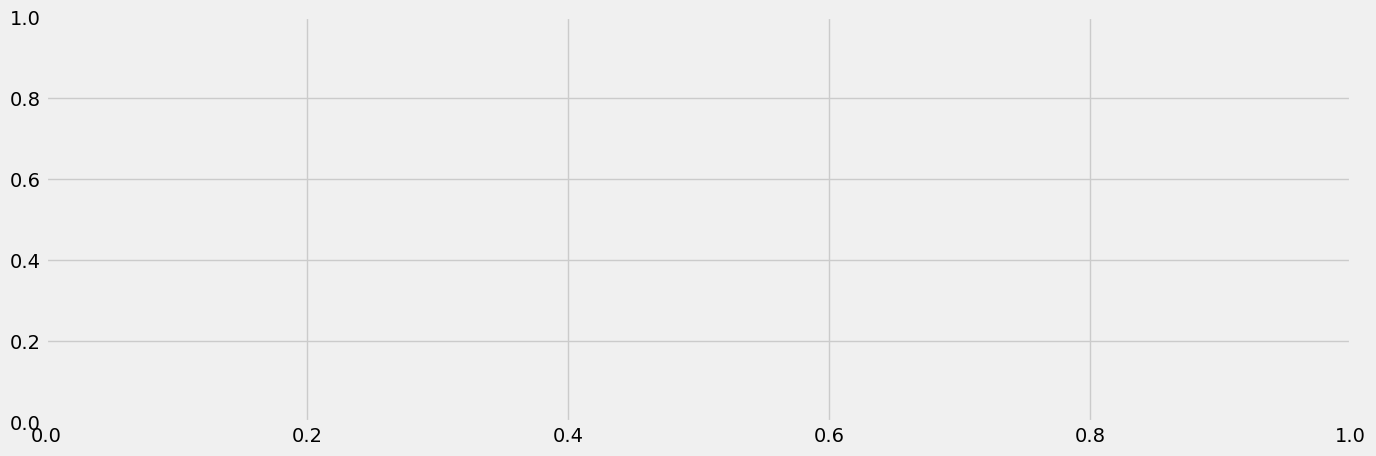

In [14]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(df)

### 2. Subsetting, wrangling, and cleaning time-series data


In [15]:
data_2 = df.reset_index()

In [16]:
data_2.head()

,index,time_series_code,date,value
0,0,BOPGS_BAL_US_adj,1992-01-01,-2026
1,1,BOPGS_EXP_US_adj,1992-01-01,50251
2,2,BOPGS_IMP_US_adj,1992-01-01,52277
3,3,BOPG_BAL_US,1992-01-01,-6210
4,4,BOPG_EXP_US,1992-01-01,33953


In [31]:
# create a subset with date and value 
data_sub=data_2[['date','value']]


In [32]:
data_sub.head()

,date,value
0,1992-01-01,-2026
1,1992-01-01,50251
2,1992-01-01,52277
3,1992-01-01,-6210
4,1992-01-01,33953


In [44]:
data_sub1 = data_sub.loc[(data_sub['date'] >= '1977-01-01') & (data_sub['date'] < '2017-09-01')]

KeyError: 'date'

In [48]:
# Set the "Date" column as the index

from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['Date']) # Create a datetime column from "Date.""
data_sub = data_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
data_sub.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
data_sub.head()

KeyError: 'Date'